In [7]:
# Figure 10 - Automatic outlier detection based on timeseries phase residual
# with standardised residual of Median Absolute Deviation

%matplotlib inline
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pysar.simulation.plot import *
from pysar.objects import sensor
from pysar.timeseries_rms import plot_rms_bar
from pysar import view

work_dir = os.path.expanduser('~/insarlab/Galapagos/GalapagosAlosAT133/PYSAR')
os.chdir(work_dir)
print('Go to directory: '+work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]

Go to directory: /Users/yunjunz/insarlab/Galapagos/GalapagosAlosAT133/PYSAR


saved figure to velocity_compare.png


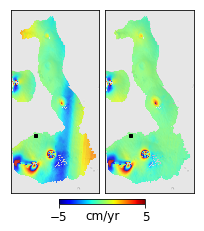

In [19]:
## Fig. 10b-c: Estimated Velocity with/without noisy SAR acquisitions

proj_dir = os.path.expanduser('~/insarlab/Galapagos/GalapagosAlosAT133/PYSAR')
fnames = [os.path.join(proj_dir, i) for i in ['velocityAll.h5', 'velocity.h5']]
dem_file = os.path.join(proj_dir, 'INPUTS/geometryRadar.h5')

print_msg = False
wrap_range = [-5, 5]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[3, 3])
for i in range(len(fnames)):
    cmd = 'view.py {} --dem {} --dem-nocontour '.format(fnames[i], dem_file)
    cmd += '--wrap --wrap-range {} {} '.format(wrap_range[0], wrap_range[1])
    #cmd += '--scalebar 0.3 0.81 0.83 --scalebar-pad 0.08 '
    cmd += '--notitle --fontsize 12 --nocbar --notick --nomultilook '
    cmd += '--ref-size 3 '
    data, atr, inps = view.prep_slice(cmd, print_msg=print_msg)
    im = view.plot_slice(axs.flatten()[i], data, atr, inps, print_msg=print_msg)[2]
plt.tight_layout(w_pad=-0.5)

# colorbar
fig.subplots_adjust(bottom=0.1)
cax = fig.add_axes([0.3, 0.05, 0.4, 0.02])
cbar = plt.colorbar(im, cax=cax, ticks=[wrap_range[0], wrap_range[1]], orientation='horizontal')
cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar.set_label('cm/yr', fontsize=font_size, labelpad=-14)

# output
out_file = 'velocity_compare.png'
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('saved figure to {}'.format(out_file))
plt.show()

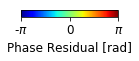

In [9]:
# Figure SX - Colorbar for Phase Residual Time-Series
fig = plt.figure(figsize=(1.5, 0.1))
ax = fig.add_axes([0.05, 0.05, 0.9, 0.9])
cbar = mpl.colorbar.ColorbarBase(ax, cmap='jet', orientation='horizontal', ticks=[0, 0.5, 1])
cbar.ax.set_xticklabels([r'-$\pi$','0', r'$\pi$'])
cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar.set_label('Phase Residual [rad]', fontsize=font_size)
plt.savefig('rms_ts_residual_cbar.png'.format(proj_name), bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()

In [8]:
# Figure SX - Phase Residual Time-Series
!view.py timeseriesResidual_ramp.h5 --wrap --figsize 4 3 --nrows 3 --ncols 9 --nomultilook --noaxis --notitle --notick --nocbar --no-tight-layout --nodisplay --dpi 600


******************** Display ********************
input file is timeseries file: /Users/yunjunz/insarlab/Galapagos/GalapagosAlosAT133/PYSAR/timeseriesResidual_ramp.h5 in float32 format
file size in y/x: (2900, 1400)
num of datasets in file timeseriesResidual_ramp.h5: 22
datasets to exclude (0):
[]
datasets to display (22):
['timeseries-20070115', 'timeseries-20070302', 'timeseries-20070718', 'timeseries-20070902', 'timeseries-20080118', 'timeseries-20080304', 'timeseries-20080604', 'timeseries-20080720', 'timeseries-20080904', 'timeseries-20090120', 'timeseries-20090307', 'timeseries-20090723', 'timeseries-20090907', 'timeseries-20091023', 'timeseries-20100310', 'timeseries-20100425', 'timeseries-20100610', 'timeseries-20100726', 'timeseries-20100910', 'timeseries-20101026', 'timeseries-20110126', 'timeseries-20110313']
data   coverage in y/x: (0, 0, 1400, 2900)
subset coverage in y/x: (0, 0, 1400, 2900)
data   coverage in lat/lon: None
subset coverage in lat/lon: None
---------------